<a href="https://colab.research.google.com/github/CptScotchTape/IT496/blob/main/Critical_Path_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

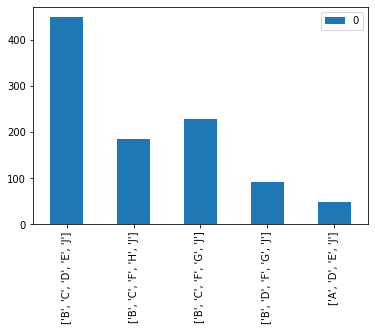

In [74]:
from logging import critical
import pandas as pd
import tensorflow_probability as tfp
from collections import Counter

tfd = tfp.distributions

tasksDF=pd.read_csv("/content/drive/MyDrive/Illinois State University/IT 497/PERT-CPM.csv")
taskNames=tasksDF['tasks']

paths = [["A","D","E","J"], ["B","C","D","E","J"], ["B","D","F","G","J"], ["B","C","F","G","J"], ["B","C","F","H","J"], ["B","J"]]

simulationDF=pd.DataFrame(columns=taskNames)

#print(simulationDF.columns)

for index, task in tasksDF.iterrows():
  dist=tfd.PERT(low=task['ai '], peak=task['mi'], high=task['bi'], temperature=4)
  simulationDF[task['tasks']]=dist.sample(1000)

#print(simulationDF.head(2))

simulationDF.to_csv("/content/drive/MyDrive/Illinois State University/IT 497/simulationDataset.csv", index=False)

# Initialize paths array
critPaths = []

for index in simulationDF.index:
  # Initialzie path lengths
  pathLenghts = []

  for path in paths:
    pathLenght = 0
    for task in path:
      pathLenght += simulationDF[task][index]
    pathLenghts.append([str(path), pathLenght])

  crit = pathLenghts[0]

  for i in range(0,len(pathLenghts)):
    # If the current path is longer than the current critical path, make it the new critical path
    if(pathLenghts[i][1] > crit[1]):
      crit = pathLenghts[i]

  critPaths.append(crit[0])

# Plot a bar graph showing the frequency of each path
critPathCounts = Counter(critPaths)
df = pd.DataFrame.from_dict(critPathCounts, orient='index')
df.plot(kind='bar')



  